# Improved Bellman-Ford algorithm with Maximum Violation Permutation problem

## Authors: LUONG Ethan, PHAM Louis-Antoine

This project aims to improve Bellman-Ford algorithm's running times by using a specific order to traverse the vertices of a given graph.

In order to determine the said order, we use a greedy algorithm that successively seeks the sources, the targets, and the vertice with the largest gap in number between its successors and its ancestors, while there is still a node to study.

In [366]:
from utils import compute_shortest_paths, glouton_fas, generate_random_test_set, display_graph, graphs_union, pick_source_from_graph
import networkx as nx
import numpy as np
import random

%load_ext autoreload
%autoreload 2

random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Bellman-Ford Algorithm

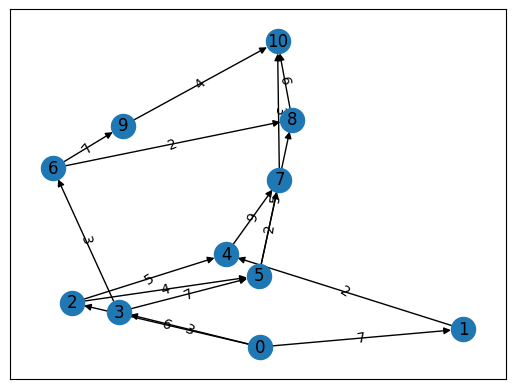

In [367]:
G1 = nx.DiGraph([(0,1,{'weight':7}), (0,2,{'weight':6}), (0,3,{'weight':3}), (1,4,{'weight':2}), (2,4,{'weight':5}), (2,5,{'weight':4}), (3,5,{'weight':7}), (3,6,{'weight':3}), (4,7,{'weight':9}), (5,7,{'weight':2}), (5,8,{'weight':5}), (6,8,{'weight':2}), (6,9,{'weight':7}), (7,10,{'weight':3}), (8,10,{'weight':6}), (9,10,{'weight':4})])
display_graph(G1)

Number of iterations: 2


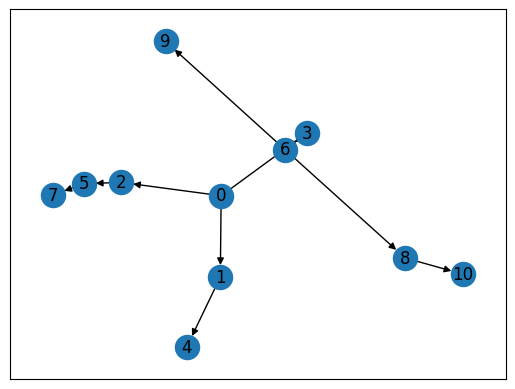

In [368]:
shortest_paths_graph, n_iterations = compute_shortest_paths(G1,0)
print(f'Number of iterations: {n_iterations}')
display_graph(shortest_paths_graph)

### 2. Greedy Algorithm: GloutonFas

In [369]:
print(f'Order: {glouton_fas(shortest_paths_graph)}')

Order: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


Order: [4, 6, 5, 8, 7, 1, 2, 3]


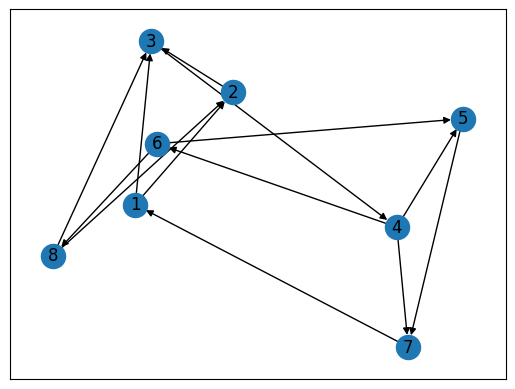

In [370]:
G2 = nx.DiGraph([(1,2), (1,3), (2,3), (3,4), (4,5), (4,6), (4,7), (5,7), (6,5), (6,8), (7,1), (8,2), (8,3)])
display_graph(G2)
print(f'Order: {glouton_fas(G2)}')

### 3. Tests of the Greedy Algorithm on Random Graphs

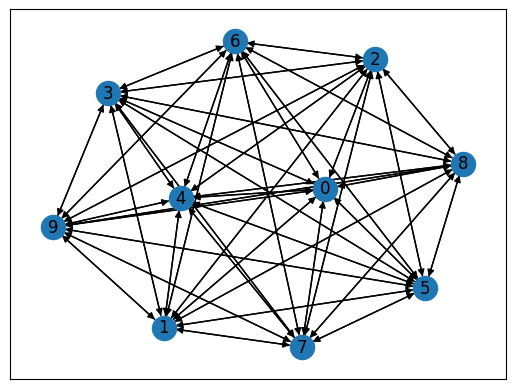

In [371]:
G, weighted_graphs = generate_random_test_set(n_instances=4, n_nodes=10, weight_min=-10, weight_max=10)
display_graph(G)

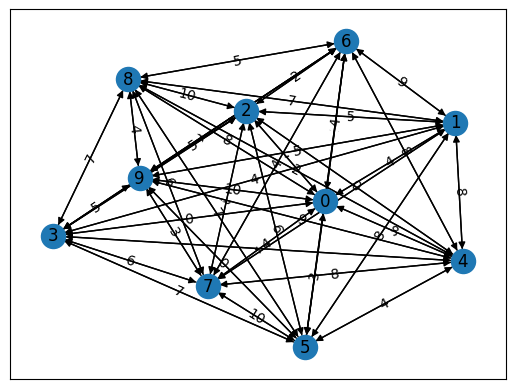

In [372]:
H = weighted_graphs[-1]
display_graph(H)

Source: 0


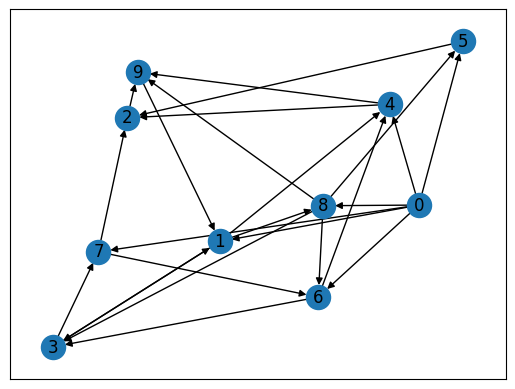

In [373]:
s = pick_source_from_graph(G)
print(f'Source: {s}')
shortest_paths = [compute_shortest_paths(graph, s)[0] for graph in weighted_graphs[:-1]]
T = graphs_union(shortest_paths)
display_graph(T)